In [121]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import subprocess
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

plt.style.use('ggplot')
%matplotlib inline

In [122]:
df=pd.read_csv("/Users/daniilvdovinov/Desktop/DATA-ANALYSYS_2/Dataset/ORGANICS.csv",encoding="cp1251")
print(df.shape)
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [123]:
df = df.fillna(df.median(axis=0), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [124]:
x=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11]

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [126]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=50)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
y_score = tree.predict(x_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))

0.7946602669866507
0.342041312272175
0.6631330977620731
0.4513026052104208
0.6425402737421421
0.36875414159788583
0.34049038904328466


[[0.95517241 0.04482759]
 [0.73641851 0.26358149]
 [0.92       0.08      ]
 ...
 [0.7037037  0.2962963 ]
 [0.98       0.02      ]
 [0.73641851 0.26358149]]
[0.04482759 0.26358149 0.08       ... 0.2962963  0.02       0.26358149]


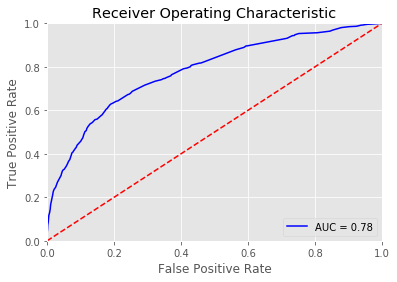

In [128]:
probs = tree.predict_proba(x_test)
print(probs)
preds = probs[:,1]
print(preds)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [129]:
tree_balanced = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=50, class_weight='balanced')
tree_balanced.fit(x_train, y_train)

y_score = tree_balanced.predict(x_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))

0.7211639418029099
0.6871202916160389
0.45696969696969697
0.5488958990536278
0.7097222649078003
0.37435731387396404
0.3587236244080628
